In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv(r"M:\ML_Practice\Statistics Distribution\economics_index.csv")

In [7]:
df.shape

(36, 5)

In [8]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,1,2.81,4.66,2603.29
1,2017,2,2.94,4.02,2708.47
2,2017,3,2.61,6.50,2694.57
3,2017,4,2.21,3.13,2988.55
4,2017,5,1.61,3.02,2717.35


In [12]:
df_index = df.copy()

In [13]:
## Drop unnecessary columns
df_index.drop(columns=['year','month'], axis=1, inplace=True)

In [16]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.81,4.66,2603.29
1,2.94,4.02,2708.47
2,2.61,6.50,2694.57
3,2.21,3.13,2988.55
4,1.61,3.02,2717.35


In [15]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


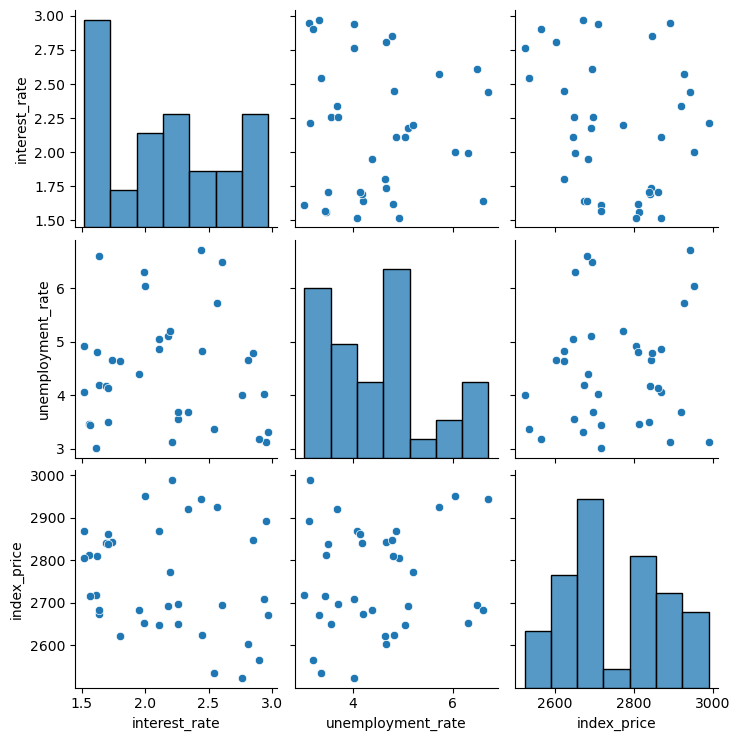

In [18]:
# To visualize some relationship
import seaborn as sns
sns.pairplot(df_index)

In [19]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.057594,-0.224341
unemployment_rate,-0.057594,1.000000,0.114233
index_price,-0.224341,0.114233,1.000000


Text(0, 0.5, 'Unemployment Rate')

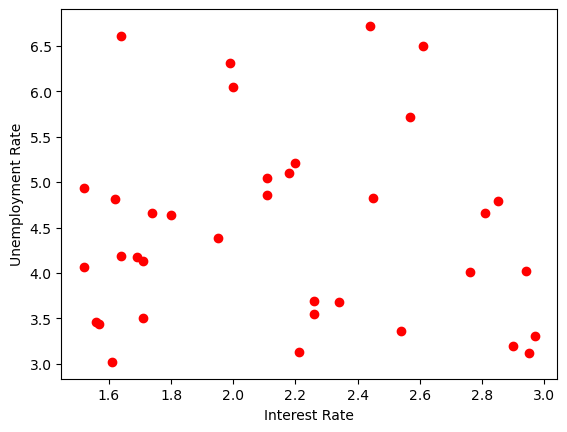

In [22]:
# visualize the dtataplot more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"], color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [23]:
# Get our dependant and Independant features
x= df_index.iloc[:,:-1]  # which means that all the columns except the last one
y = df_index.iloc[:,-1]

In [24]:
x.head()

,interest_rate,unemployment_rate
0,2.81,4.66
1,2.94,4.02
2,2.61,6.50
3,2.21,3.13
4,1.61,3.02


In [25]:
y.head()

0    2603.29
1    2708.47
2    2694.57
3    2988.55
4    2717.35
Name: index_price, dtype: float64

In [26]:
# Train and Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [29]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

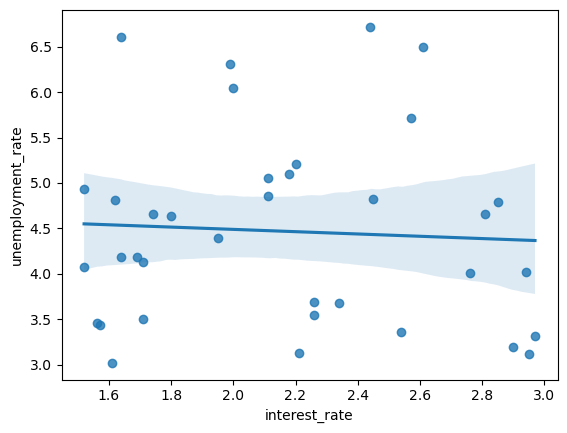

In [32]:
# We can see the probable regression line by a command
sns.regplot(x=df_index["interest_rate"], y=df_index["unemployment_rate"])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

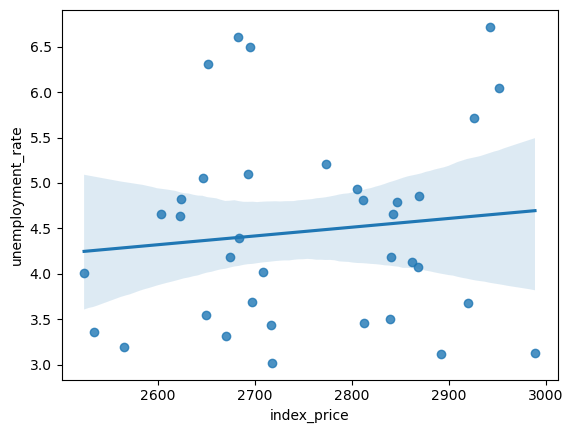

In [33]:
sns.regplot(x=df_index["index_price"], y=df_index["unemployment_rate"])


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [37]:
x_train

array([[-1.21282494,  2.23385969],
       [-1.37852398, -0.92631607],
       [ 0.23704169, -0.70560538],
       [ 1.21052356,  0.27756041],
       [-1.27496208, -1.36773745],
       [-0.0943564 ,  0.71898179],
       [ 0.71342644,  1.34098464],
       [ 0.07134264, -0.69557308],
       [ 0.07134264, -0.83602533],
       [-1.00570114,  0.27756041],
       [ 1.47978451, -0.36450705],
       [-1.10926304, -0.20399018],
       [ 0.79627596,  2.12350435],
       [ 1.54192165, -1.07680063],
       [-0.03221926, -1.2573821 ],
       [-0.05293164,  0.82933713],
       [-0.23934306,  0.47820649],
       [-0.46717925,  1.67205067],
       [-0.23934306,  0.66882027],
       [ 1.10696166, -0.37453935],
       [-0.57074115,  0.0066882 ],
       [-1.06783828, -0.2541517 ],
       [ 1.50049689, -1.26741441],
       [ 1.29337309,  0.40798036],
       [-1.4613735 , -0.31434553],
       [-1.21282494, -0.19395788],
       [ 1.39693499, -1.19718828]])

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [39]:
regression.fit(x_train, y_train)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score

In [42]:
validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [43]:
np.mean(validation_score)

-16754.13907959621

In [44]:
# Prediction
y_predict = regression.predict(x_test)
y_predict

array([2714.35687416, 2798.40402697, 2780.82670148, 2790.22140842,
       2775.57039562, 2791.89724279, 2724.00495259, 2763.22941433,
       2728.01231698])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 14882.887895581474
Mean Absolute Error: 102.30826951450783
Root Mean Squared Error: 121.99544210986521


In [50]:
from sklearn.metrics import r2_score

In [52]:
r2Score = r2_score(y_test,y_predict)
print(f"R square value is: {r2Score}")

R square value is: 0.019783097836451935


In [53]:
# Display adjusted R-squared
1-(1-r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-0.3069558695513974

##### Assumptions

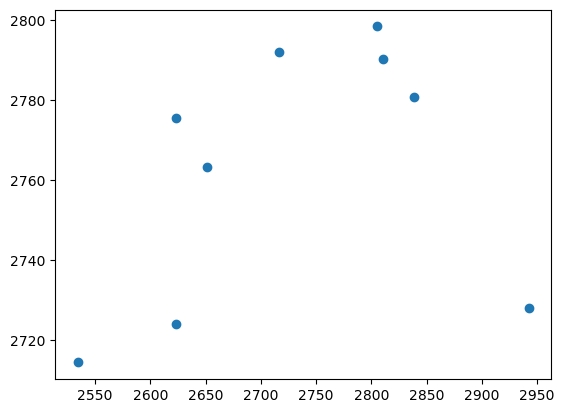

In [55]:
plt.scatter(y_test,y_predict)

In [56]:
residuals = y_test - y_predict
print(residuals)

35   -180.146874
13      6.845973
26     57.943299
30     20.598592
16   -152.810396
31    -75.677243
21   -100.674953
12   -111.619414
8     214.457683
Name: index_price, dtype: float64


C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


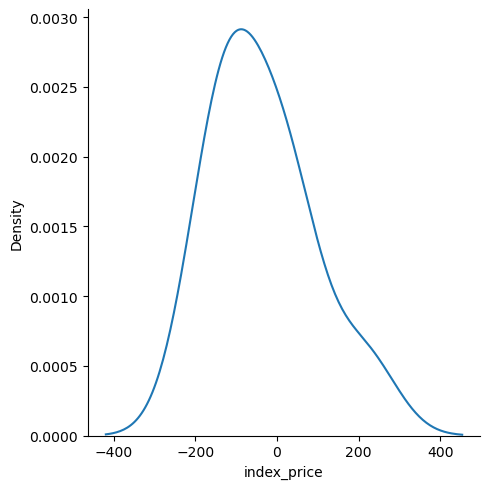

In [57]:
## Plot this residuals
sns.displot(residuals, kind = 'kde')

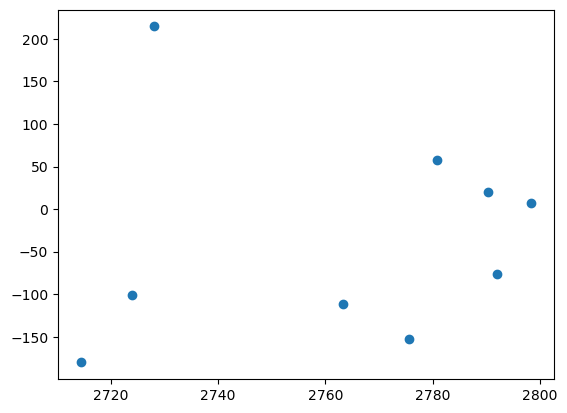

In [59]:
## Create a scatter plot with respect to prediction and residuals
plt.scatter(y_predict, residuals)

In [60]:
## OLS Linear Regression
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train, x_train).fit()

In [62]:
prediction = model.predict(x_test)
print(prediction)

[-48.59016288  35.45698993  17.87966445  27.27437138  12.62335858
  28.95020575 -38.94208445   0.2823773  -34.93472006]


In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.080
Method:                 Least Squares   F-statistic:                           0.001596
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                       0.998
Time:                        13:07:31   Log-Likelihood:                         -252.29
No. Observations:                  27   AIC:                                      508.6
Df Residuals:                      25   BIC:                                      511.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
print(regression.coef_)

[-30.9884092   1.9154238]


### So, comparing the coeffient we can see both are some, that means our model is working good. 